In [5]:
import pandas as pd
import matplotlib as plt
import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

covariates = pd.read_csv("eqtl_covariates_num_encoded_20201001.tsv", sep="\t")

covariates.rename(columns={"id": "IID"}, inplace=True)
covariates = covariates.loc[covariates["anypards"] == 1.0]

covariates.head()

,IID,anypards,male,race,ethnic,prismrom,death90,ventfreeday
0,01-002,1.0,0,7,2,44.296434,0.0,15.696528
1,01-003,1.0,0,7,2,0.719391,0.0,24.776389
2,01-004,1.0,1,7,3,86.372035,0.0,25.061111
3,01-005,1.0,0,7,2,22.785551,0.0,27.318056
4,01-006,1.0,1,7,3,0.950055,0.0,25.104167


Ttest_indResult(statistic=array([-6.19054286,  8.95841866, 34.54411864, 55.64835405, 12.16177579]), pvalue=array([1.36087898e-009, 9.02395961e-018, 3.79046362e-128, 8.03784693e-203,
       1.37462701e-029]))
 
-------------LOGISTIC REGRESSION Model 1-------Using Predicted Score (SCORE)----------
 
Optimization terminated successfully.
         Current function value: 0.365580
         Iterations 7
 
Stats models logistic regression pvalues
 SCORE       0.592681
male        0.411843
race        0.264935
ethnic      0.000009
prismrom    0.000016
dtype: float64
 
stats models pckg: log model                             Logit Regression Results                           
Dep. Variable:                death90   No. Observations:                  224
Model:                          Logit   Df Residuals:                      219
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Nov 2020   Pseudo R-squ.:                  0.1086
Time:   

,FID,IID,PHENO,CNT,CNT2,SCORE,anypards,male,race,ethnic,prismrom,death90,ventfreeday
0,1,08-002,0.199928,6,0,0.000000,1.0,0,7,2,0.499058,0.0,0.000000
1,2,08-004,0.494932,6,0,0.000000,1.0,0,5,2,46.364925,0.0,19.961806
2,3,08-015,-0.578354,6,1,-0.030167,1.0,1,7,3,0.375801,0.0,0.000000
3,4,10-018,-1.510750,6,0,0.000000,1.0,0,8,2,40.717408,0.0,17.350000
4,5,10-020,1.070230,6,0,0.000000,1.0,0,7,2,0.703038,1.0,0.000000


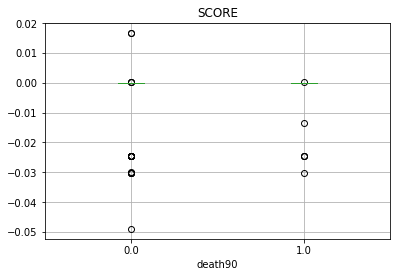

In [6]:
ESPNL = pd.read_csv("make_score/ESPNL.plink.profile",  sep=r"\s*")
ESPNL = pd.merge(ESPNL, covariates, on="IID" )
axes = ESPNL.boxplot(column=['SCORE'], by='death90')

fig = axes.get_figure()
fig.suptitle('')

x = ESPNL[["SCORE", "male", "race", "ethnic", "prismrom"]]
y = ESPNL["death90"]

print(scipy.stats.ttest_ind(x,y))
print(" ")
print("-------------LOGISTIC REGRESSION Model 1-------Using Predicted Score (SCORE)----------")
print(" ")
log_model_sm_score = sm.Logit(y, x)
sm_result_score = log_model_sm_score.fit(maxiter=500)
print(" ")
print("Stats models logistic regression pvalues\n",sm_result_score.pvalues)

print(" ")
print("stats models pckg: log model ",sm_result_score.summary())


print(" ")
print("-------------LOGISTIC REGRESSION MODEL 2-------Using Measured Expression (PHENO)----------")

x = ESPNL[["PHENO", "male", "race", "ethnic", "prismrom"]]
y = ESPNL[["death90"]]

print(" ")
log_model_sm_exp = sm.Logit(y, x)
sm_result_exp = log_model_sm_exp.fit(maxiter=500)
print(" ")
print("Stats models logistic regression pvalues\n",sm_result_exp.pvalues)

print(" ")
print("stats models pckg: log model ",sm_result_exp.summary())

ESPNL.head()

Ttest_indResult(statistic=array([-4.15559257,  8.95841866, 34.54411864, 55.64835405, 12.16177579]), pvalue=array([3.89047218e-005, 9.02395961e-018, 3.79046362e-128, 8.03784693e-203,
       1.37462701e-029]))
 
-------------LOGISTIC REGRESSION Model 1-------Using Predicted Score (SCORE)----------
 
Optimization terminated successfully.
         Current function value: 0.364996
         Iterations 7
 
Stats models logistic regression pvalues
 SCORE       0.427565
male        0.438420
race        0.293452
ethnic      0.000009
prismrom    0.000008
dtype: float64
 
stats models pckg: log model                             Logit Regression Results                           
Dep. Variable:                death90   No. Observations:                  224
Model:                          Logit   Df Residuals:                      219
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Nov 2020   Pseudo R-squ.:                  0.1100
Time:   

,FID,IID,PHENO,CNT,CNT2,SCORE,anypards,male,race,ethnic,prismrom,death90,ventfreeday
0,1,08-002,0.401740,2,0,0.0,1.0,0,7,2,0.499058,0.0,0.000000
1,2,08-004,-0.212223,2,0,0.0,1.0,0,5,2,46.364925,0.0,19.961806
2,3,08-015,-0.666014,2,0,0.0,1.0,1,7,3,0.375801,0.0,0.000000
3,4,10-018,0.299307,2,0,0.0,1.0,0,8,2,40.717408,0.0,17.350000
4,5,10-020,0.522330,2,0,0.0,1.0,0,7,2,0.703038,1.0,0.000000


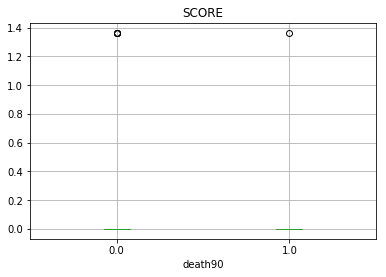

In [7]:
AC092620 = pd.read_csv("make_score/AC092620.2.plink.profile",  sep=r"\s*")
AC092620 = pd.merge(AC092620, covariates, on="IID" )
axes = AC092620.boxplot(column=['SCORE'], by='death90')

fig = axes.get_figure()
fig.suptitle('')

x = AC092620[["SCORE", "male", "race", "ethnic", "prismrom"]]
y = AC092620["death90"]

print(scipy.stats.ttest_ind(x,y))
print(" ")
print("-------------LOGISTIC REGRESSION Model 1-------Using Predicted Score (SCORE)----------")
print(" ")
log_model_sm_score = sm.Logit(y, x)
sm_result_score = log_model_sm_score.fit(maxiter=500)
print(" ")
print("Stats models logistic regression pvalues\n",sm_result_score.pvalues)

print(" ")
print("stats models pckg: log model ",sm_result_score.summary())


print(" ")
print("-------------LOGISTIC REGRESSION MODEL 2-------Using Measured Expression (PHENO)----------")

x = AC092620[["PHENO", "male", "race", "ethnic", "prismrom"]]
y = AC092620[["death90"]]

print(" ")
log_model_sm_exp = sm.Logit(y, x)
sm_result_exp = log_model_sm_exp.fit(maxiter=500)
print(" ")
print("Stats models logistic regression pvalues\n",sm_result_exp.pvalues)

print(" ")
print("stats models pckg: log model ",sm_result_exp.summary())

AC092620.head()

Ttest_indResult(statistic=array([ 5.5450923 ,  8.95841866, 34.54411864, 55.64835405, 12.16177579]), pvalue=array([5.04001717e-008, 9.02395961e-018, 3.79046362e-128, 8.03784693e-203,
       1.37462701e-029]))
 
-------------LOGISTIC REGRESSION Model 1-------Using Predicted Score (SCORE)----------
 
Optimization terminated successfully.
         Current function value: 0.360480
         Iterations 7
 
Stats models logistic regression pvalues
 SCORE       0.137971
male        0.314711
race        0.313315
ethnic      0.000043
prismrom    0.000007
dtype: float64
 
stats models pckg: log model                             Logit Regression Results                           
Dep. Variable:                death90   No. Observations:                  224
Model:                          Logit   Df Residuals:                      219
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Nov 2020   Pseudo R-squ.:                  0.1210
Time:   

,FID,IID,PHENO,CNT,CNT2,SCORE,anypards,male,race,ethnic,prismrom,death90,ventfreeday
0,1,08-002,-1.259960,2,0,0.000,1.0,0,7,2,0.499058,0.0,0.000000
1,2,08-004,-0.299307,2,0,0.000,1.0,0,5,2,46.364925,0.0,19.961806
2,3,08-015,0.175427,2,0,0.000,1.0,1,7,3,0.375801,0.0,0.000000
3,4,10-018,0.842050,2,1,3.845,1.0,0,8,2,40.717408,0.0,17.350000
4,5,10-020,0.042141,2,0,0.000,1.0,0,7,2,0.703038,1.0,0.000000


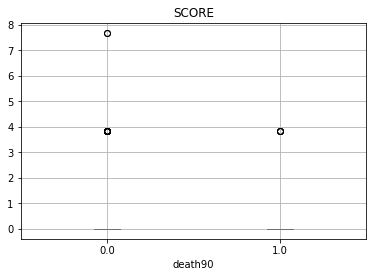

In [8]:
TMPRSS9 = pd.read_csv("make_score/TMPRSS9.plink.profile",  sep=r"\s*")
TMPRSS9 = pd.merge(TMPRSS9, covariates, on="IID" )
axes = TMPRSS9.boxplot(column=['SCORE'], by='death90')

fig = axes.get_figure()
fig.suptitle('')

x = TMPRSS9[["SCORE", "male", "race", "ethnic", "prismrom"]]
y = TMPRSS9["death90"]

print(scipy.stats.ttest_ind(x,y))
print(" ")
print("-------------LOGISTIC REGRESSION Model 1-------Using Predicted Score (SCORE)----------")
print(" ")
log_model_sm_score = sm.Logit(y, x)
sm_result_score = log_model_sm_score.fit(maxiter=500)
print(" ")
print("Stats models logistic regression pvalues\n",sm_result_score.pvalues)

print(" ")
print("stats models pckg: log model ",sm_result_score.summary())


print(" ")
print("-------------LOGISTIC REGRESSION MODEL 2-------Using Measured Expression (PHENO)----------")

x = TMPRSS9[["PHENO", "male", "race", "ethnic", "prismrom"]]
y = TMPRSS9[["death90"]]

print(" ")
log_model_sm_exp = sm.Logit(y, x)
sm_result_exp = log_model_sm_exp.fit(maxiter=500)
print(" ")
print("Stats models logistic regression pvalues\n",sm_result_exp.pvalues)

print(" ")
print("stats models pckg: log model ",sm_result_exp.summary())

TMPRSS9.head()